<ipython-input-6-a9e41c9727bf>:8: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  torch.nn.init.normal(conv1.weight,mean=0,std=1)


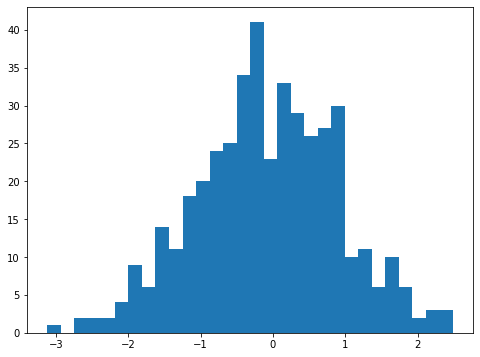

In [6]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
# 针对一个才能的权重初始化的方法
conv1=torch.nn.Conv2d(3,16,3)
# 使用标准张态分布初始化权重
torch.manual_seed(12) # 随机数初始化种子
torch.nn.init.normal(conv1.weight,mean=0,std=1)
# 使用直方图可视化conv1.weight的数据的分布情况
plt.figure(figsize=(8,6))
plt.hist(conv1.weight.data.numpy().reshape(-1,1),bins=30)
plt.show()

In [7]:
# 使用指定值初始化偏置
torch.nn.init.constant(conv1.bias,val=0.1)


<ipython-input-7-6291ef83d213>:2: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  torch.nn.init.constant(conv1.bias,val=0.1)


Parameter containing:
tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000],
       requires_grad=True)

In [11]:
# 建立一个测试网络
class TestNet(nn.Module):
    def __init__(self):
        super(TestNet,self).__init__()
        self.convl=nn.Conv2d(3,16,3)
        self.hidden=nn.Sequential(
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Linear(100,50),
            nn.ReLU(),
        )
        self.cla=nn.Linear(50,10)
    # 定义网络的前向传播路径
    def forward(self,x):
        x=self.convl(x)
        x=x.view(x.shape[0],-1)
        x=self.hidden(x)
        output=self.cla(x)
        return output
# 输出我们的网络结构
testnet=TestNet()
print(testnet)

TestNet(
  (convl): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (hidden): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): ReLU()
  )
  (cla): Linear(in_features=50, out_features=10, bias=True)
)


In [12]:
# 定义为网络中的每一层进行权重初始化的函数
def init_weights(m):
    if type(m)==nn.Conv2d: # 如果为卷积层
        torch.nn.init.normal(m.weight,mean=0,std=0.5)
    # 如果为全连接层
    if type(m)==nn.Linear:
        torch.nn.init.uniform(m.weight,a=-0.1,b=0.1)
        m.bias.data.fill_(0.01)


In [13]:
# 使用网络的apply方法进行权重初始化
torch.manual_seed(13) # 随机数种子
testnet.apply(init_weights)

<ipython-input-12-b94bc964bf5a>:4: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  torch.nn.init.normal(m.weight,mean=0,std=0.5)
<ipython-input-12-b94bc964bf5a>:7: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  torch.nn.init.uniform(m.weight,a=-0.1,b=0.1)


TestNet(
  (convl): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (hidden): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): ReLU()
  )
  (cla): Linear(in_features=50, out_features=10, bias=True)
)